In [1]:
# capital managmnet

In [2]:
#kelly

In [2]:
import math
import time
import numpy as np
import pandas as pd
import datetime as dt
import cufflinks as cf 
from pylab import plt

In [3]:
np.random.seed(1000)
plt.style.use('seaborn')

In [4]:
p =.55

In [5]:
f = p - (1-p)

In [6]:
f

0.10000000000000009

In [7]:
I = 50
n = 100

In [8]:
def run_simulation(f):
    c = np.zeros((n, I))
    c[0] = 100
    for i in range(I):
        for t in range(1, n):
            o = np.random.binomial(1, p)
            if o>0:
                c[t, i] = (1 + f) * c[t - 1, i]
            else:
                c[t, i] = (1 - f) * c[t - 1, i]
    return c

In [9]:
c_1 = run_simulation(f)

In [10]:
c_1.round(2)

array([[100.  , 100.  , 100.  , ..., 100.  , 100.  , 100.  ],
       [ 90.  , 110.  ,  90.  , ..., 110.  ,  90.  , 110.  ],
       [ 99.  , 121.  ,  99.  , ..., 121.  ,  81.  , 121.  ],
       ...,
       [226.35, 338.13, 413.27, ..., 123.97, 123.97, 123.97],
       [248.99, 371.94, 454.6 , ..., 136.37, 136.37, 136.37],
       [273.89, 409.14, 409.14, ..., 122.73, 150.01, 122.73]])

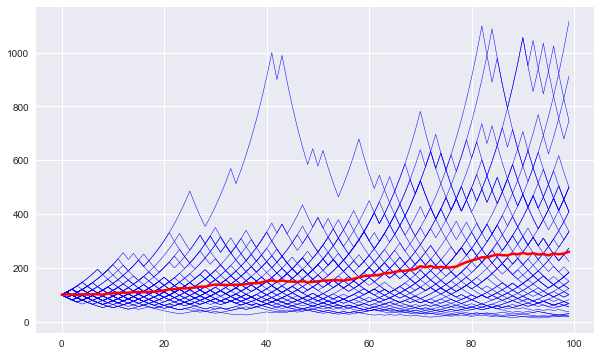

In [11]:
plt.figure(figsize=(10,6))
plt.plot(c_1, 'b', lw=0.5)
plt.plot(c_1.mean(axis=1), 'r', lw=2.5)

In [12]:
c_2 = run_simulation(0.05)
c_3 = run_simulation(0.25)
c_4 = run_simulation(0.5)

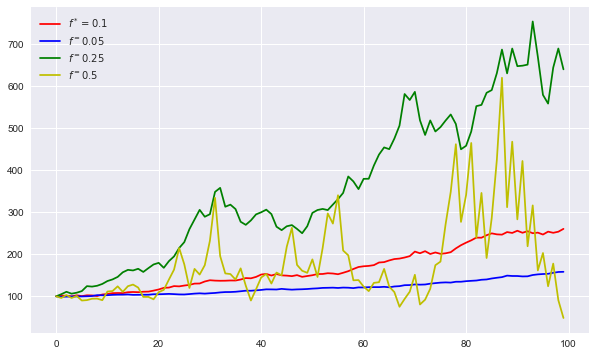

In [13]:
plt.figure(figsize=(10,6))
plt.plot(c_1.mean(axis=1), 'r', label='$f^*=0.1$')
plt.plot(c_2.mean(axis=1), 'b', label='$f^=0.05$')
plt.plot(c_3.mean(axis=1), 'g', label='$f^=0.25$')
plt.plot(c_4.mean(axis=1), 'y', label='$f^=0.5$')
plt.legend(loc=0)

In [14]:
raw = pd.read_csv('http://hilpisch.com/tr_eikon_eod_data.csv',
                   index_col=0, parse_dates=True)

In [15]:
symbol = '.SPX'

In [16]:
data = pd.DataFrame(raw[symbol])

In [17]:
data['returns'] = np.log(data / data.shift(1))

In [18]:
data.dropna(inplace=True)

In [19]:
data.tail()

,.SPX,returns
Date,,
2018-06-25,2717.07,-0.013820
2018-06-26,2723.06,0.002202
2018-06-27,2699.63,-0.008642
2018-06-28,2716.31,0.006160
2018-06-29,2718.37,0.000758


In [20]:
mu = data.returns.mean() * 252

In [21]:
mu

0.09898579893004976

In [23]:
sigma = data.returns.std() * 252 ** 0.5

In [24]:
sigma

0.1488567510081967

In [25]:
r = 0.0

In [26]:
f = (mu-r) / sigma ** 2

In [27]:
f

4.4672043679706865

In [53]:
equs = []

In [51]:
def kelly_strategy(f):
    global equs
    equ = 'equity_{:.2f}'.format(f)
    equs.append(equ)
    cap = 'capital_{:.2f}'.format(f)
    data[equ] = 1
    data[cap] = data[equ] * f
    for i, t in enumerate(data.index[1:]):
        t_1 = data.index[i]
        data.loc[t, cap] = data[cap].loc[t_1] * math.exp(data['returns'].loc[t])
        data.loc[t, equ] = data[cap].loc[t] - data[cap].loc[t_1] + data[equ].loc[t_1]
        data.loc[t, cap] = data[equ].loc[t] * f

In [54]:
kelly_strategy(f * 0.5)

In [55]:
kelly_strategy(f * 0.66)

In [56]:
kelly_strategy(f)

In [57]:
print(data[equs].tail())

            equity_2.23  equity_2.95  equity_4.47
Date                                             
2018-06-25     4.707070     6.367340     8.794342
2018-06-26     4.730248     6.408727     8.880952
2018-06-27     4.639340     6.246147     8.539593
2018-06-28     4.703365     6.359932     8.775296
2018-06-29     4.711332     6.374152     8.805026


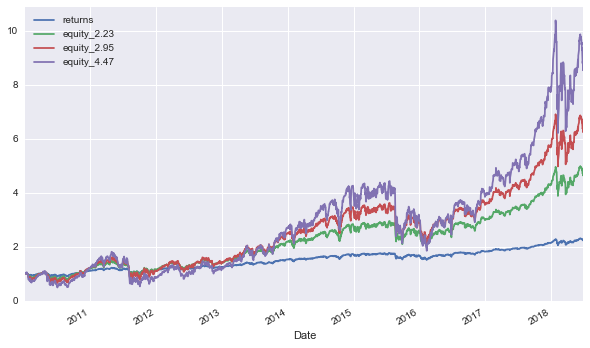

In [60]:
ax = data['returns'].cumsum().apply(np.exp).plot(legend = True,figsize=(10,6))
data[equs].plot(ax=ax, legend=True);

In [62]:
#vectorized backtesting
import fxcmpy

In [71]:
token = 'edc562649d23a63d2d685ba64af98c88ca68389b'

In [73]:
api = fxcmpy.fxcmpy(access_token=token,log_level='error')

|ERROR|2020-01-14 14:25:32,522|Socket returns unknown error.


ServerError: Can not connect to FXCM Server.